# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
# Select only the first two features (columns 0 and 1)
X = iris.data[:, :2]

# Remove class 2 from the dataset
X = X[iris.target != 2]
y = iris.target[iris.target != 2]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

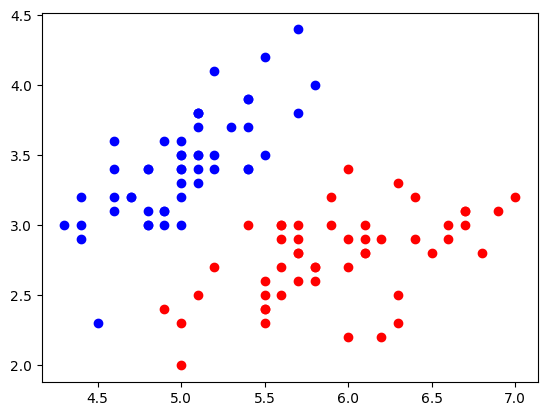

In [ ]:
import matplotlib.pyplot as plt

#plt.scatter(X[:,0],X[:,1])

plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(X[y==2,0],X[y==2,1],color='cyan')


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
X = iris.data[iris.target != 2, 0:2]
print(X.shape)

y = iris.target[iris.target != 2]

SVMmodel_1 = SVC(kernel='linear', C=200)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)

SVMmodel_1.fit(X_train_1, y_train_1)

#print(SVMmodel_1.get_params())

SVMmodel_1.score(X_test_1, y_test_1)


(100, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 6.31429691 -5.26114429]]
[-17.31404672]


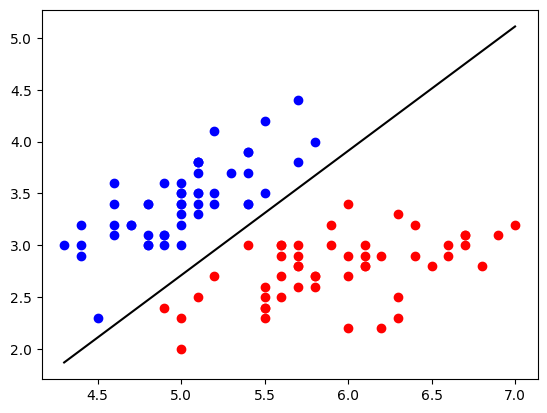

In [ ]:
supvectors = SVMmodel_1.support_vectors_
# Plot the support vectors here

# Separating line coefficients:
W = SVMmodel_1.coef_
b = SVMmodel_1.intercept_

print(W)
print(b)

import numpy as np

x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2 = -b/W[0,1] - W[0,0]/W[0,1] * x1

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red')
plt.plot(x1, x2, color='black')


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

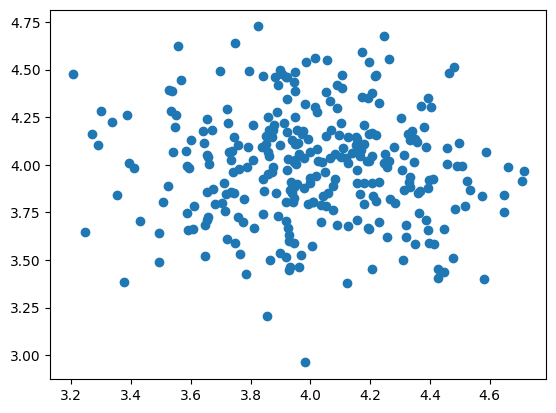

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

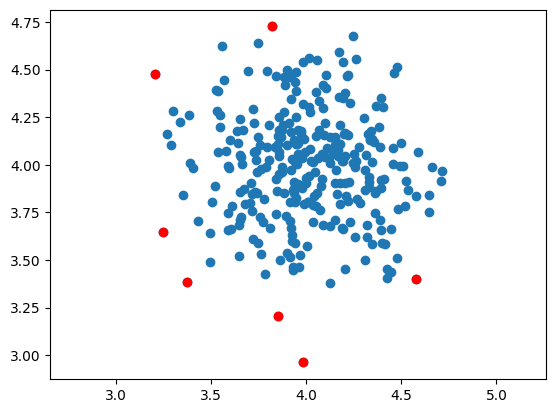

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

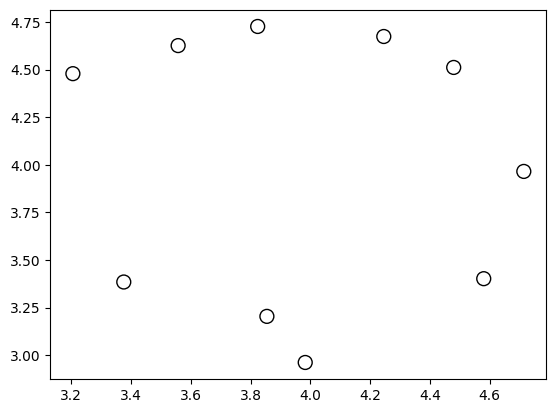

In [ ]:
# Get support vectors
support_vectors = SVMmodelOne.support_vectors_

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            edgecolors='black', facecolors='none', s=100, label="Support Vectors")


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

Threshold: 8.989098620408397


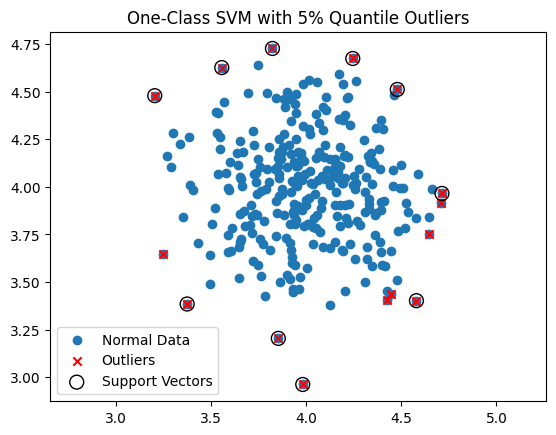

In [ ]:
from numpy import quantile, where

# Compute anomaly scores for each sample
scores = SVMmodelOne.score_samples(x)

# Set threshold at the 5% quantile (adjustable)
thresh = quantile(scores, 0.05)  # Now using 5% instead of 8%
print("Threshold:", thresh)

# Identify points below the threshold as outliers
index = where(scores <= thresh)
values = x[index]  # Extract the outlier points

# Plot data points
plt.scatter(x[:, 0], x[:, 1], label="Normal Data")

# Plot outliers (red)
plt.scatter(values[:, 0], values[:, 1], color='red', label="Outliers", marker='x')

# Plot support vectors (optional)
plt.scatter(SVMmodelOne.support_vectors_[:, 0], SVMmodelOne.support_vectors_[:, 1],
            edgecolors='black', facecolors='none', s=100, label="Support Vectors")

# Formatting
plt.axis('equal')
plt.legend()
plt.title("One-Class SVM with 5% Quantile Outliers")
plt.show()
